In [27]:
import numpy as np
from scipy import special

In [28]:
cutoffDim = 9

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Photon number stateの例. 
Coherent stateはPhoton Number Stateにより一般に以下のように表される。

$\ket{\alpha} = \exp{(-|\alpha|^{2} / 2)} \sum_n \frac{\alpha^n}{\sqrt{n!}} \ket{n}$

In [29]:
def coherentState(alpha, cutoff = 10):
    dim = cutoff + 1
    n = np.arange(dim)
    state = np.exp(- 0.5 * np.abs(alpha)**2) / np.sqrt(special.factorial([n])) * alpha**n
    return state

In [30]:
alpha = 1 + 1j
state = coherentState(alpha)
print(state)
np.sum(np.abs(state) ** 2)

[[ 0.36787944+0.j          0.36787944+0.36787944j  0.        +0.5202601j
  -0.30037231+0.30037231j -0.30037231+0.j         -0.13433058-0.13433058j
   0.        -0.10968046j  0.04145532-0.04145532j  0.02931334+0.j
   0.00977111+0.00977111j  0.        +0.00617979j]]


0.9999916917756309

## Displacement Operator  
Coherent stateは実はvacuum stateにDisplacement operatorを作用させた状態。  
$\ket{\alpha} = D(\alpha)\ket{0}$

$D(\alpha) = \exp(\alpha \hat{a}^{\dagger} - \alpha^* \hat{a})$  
ordering theoryを使うと  
$D(\alpha) = \exp(-|\alpha|^2 / 2) \exp(\alpha \hat{a}^{\dagger}) \exp(-\alpha^* \hat{a})$  

これを任意のphoton number stateに作用させる計算を考える。

annihiration operator.   
$\hat{a} \ket{n} = \sqrt{n}\ket{n-1}$  
$\hat{a} \ket{0} = 0$

In [31]:
def down(order, n):
    if order > n:
        return [0, 0]
    n_ = n - order
    coeff = np.prod(np.sqrt(np.arange(n, n - order, -1)))
    return [coeff, n_]

In [32]:
down(2, 3)

[2.4494897427831783, 1]

creation operator  
$\hat{a}^{\dagger} \ket{n} = \sqrt{n + 1}\ket{n + 1}$

In [33]:
def up(order, n, cutoff = 10):
    n_ = n + order
    if n_ > cutoff:
        return [0, 0]
    coeff = np.prod(np.sqrt(np.arange(n + 1, n + 1 + order)))
    return [coeff, n_]

In [34]:
up(2, 3)

[4.47213595499958, 5]

annihiration/creation operatorを指数関数の肩に乗せる。  
指数関数の定義に従いべき級数展開する。

$\exp(\alpha \hat{a}) = \sum_{n} \frac{1}{n!}(\alpha \hat{a})^n$

In [35]:
def exp_annihiration(fockState, alpha, cutoff):
    if np.isscalar(fockState):
        list_ = [fockState]
        fockState = np.ones(fockState + 1)
    else:
        list_ = np.nonzero(fockState)[0]
        
    state = np.zeros(cutoff + 1) + 0j
    for j in list_:
        for i in range(cutoff + 1):
            tmp =  down(i, j)
            state[np.int(tmp[1])] += tmp[0] * fockState[j] / special.factorial([i]) * alpha ** i
    return state

In [36]:
fockState = np.zeros(10)
fockState[0] = 1 / np.sqrt(2)
fockState[1] = 1 / np.sqrt(2)
print(exp_annihiration(fockState, 1 + 1j, 10))

[1.41421356+0.70710678j 0.70710678+0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j        ]


creation operator も全く同様

In [37]:
def exp_creation(fockState, alpha, cutoff):
    if np.isscalar(fockState):
        list_ = [fockState]
        fockState = np.ones(fockState + 1)
    else:
        list_ = np.nonzero(fockState)[0]
        
    state = np.zeros(cutoff + 1) + 0j
    for j in list_:
        for i in range(cutoff + 1):
            tmp =  up(i, j)
            state[np.int(tmp[1])] += tmp[0] * fockState[j] / special.factorial([i]) * alpha ** i
    return state

In [38]:
fockState = np.zeros(10)
fockState[0] = 1 / np.sqrt(2)
fockState[1] = 1 / np.sqrt(2)
print(exp_creation(fockState, 1 + 1j, 10))

[ 0.70710678+0.j          1.41421356+0.70710678j  1.        +2.j
 -0.57735027+2.30940108j -1.73205081+1.15470054j -1.54919334-0.25819889j
 -0.63245553-0.84327404j  0.07968191-0.63745526j  0.28171808-0.22537447j
  0.18781206+0.01878121j  0.05939139+0.07126966j]


ここで、Displacement operatorを実装してみる。  
関数を適切に作っておいたので簡単。

$D(\alpha) = \exp(-|\alpha|^2 / 2) \exp(\alpha \hat{a}^{\dagger}) \exp(-\alpha^* \hat{a})$  

In [39]:
def displacement(fockState, alpha, cutoff):
    state_ = exp_annihiration(fockState, -np.conj(alpha), cutoff)
    state = exp_creation(state_, alpha, cutoff)
    return state * np.exp(-np.abs(alpha)**2 / 2)    

In [14]:
cutoff = 10
fockState = np.zeros(10)
fockState[0] = 1
alpha = 1 - 1j
print(coherentState(alpha, cutoff))
print(displacement(fockState, alpha, cutoff))

[[ 0.36787944+0.j          0.36787944-0.36787944j  0.        -0.5202601j
  -0.30037231-0.30037231j -0.30037231-0.j         -0.13433058+0.13433058j
  -0.        +0.10968046j  0.04145532+0.04145532j  0.02931334+0.j
   0.00977111-0.00977111j  0.        -0.00617979j]]
[ 0.36787944+0.j          0.36787944-0.36787944j  0.        -0.5202601j
 -0.30037231-0.30037231j -0.30037231+0.j         -0.13433058+0.13433058j
  0.        +0.10968046j  0.04145532+0.04145532j  0.02931334+0.j
  0.00977111-0.00977111j  0.        -0.00617979j]


一致しているため、ここまではOK

### 光子数密度演算子を状態発展させる

光子数基底の密度行列は以下のように書ける。  
$\rho = \sum_{l, m}C_{lm}\ket{l}\bra{m}$

状態発展  
$\rho' = D^{\dagger}(\alpha)\rho D(\alpha)$

In [15]:
def Displacement(rho, alpha, cutoff=10):
    dim = cutoff + 1
    rho_ = np.zeros([dim, dim]) + 0j
    for row in range(dim):
        for col in range(dim):
            ket = displacement(row, alpha, cutoff)
            bra = displacement(col, alpha, cutoff)
            rho_ += rho[row, col] * np.outer(np.conj(ket), bra)
    return rho_

In [16]:
rho = np.zeros([11, 11])
rho[0, 0] = 1
rho_ = Displacement(rho, 1+1j)
print(np.sum(np.diag(rho_)))

(0.9999916917756311+0j)


### 光子数密度演算子のWigner関数

$n \leq n'$の場合  
$W_{nn'}(q, p) = \frac{2(-1)^n}{\pi} \sqrt{\frac{2^{n'} n!}{2^{n} n'!}} (q-ip)^{n'-n}e^{-(q^2+p^2)}L_{n}^{n'-n}(2(q^2+p^2))$  
$n' \leq n$の場合  
$W_{nn'}(q, p) = \frac{2(-1)^{n'}}{\pi} \sqrt{\frac{2^{n} n'!}{2^{n'} n!}} (q+ip)^{n-n'}e^{-(q^2+p^2)}L_{n'}^{n-n'}(2(q^2+p^2))$  

量子力学分野でラゲール陪多項式と書かれたものがソニンの多項式であることがままある。  
上式$L_l^{m}(x)$もそう。

ソニンの多項式  

漸化式  
$n S^{\alpha}_{n}(x) = (2n-1+\alpha-x)S^{\alpha}_{n-1}(x) -(n + \alpha -1)S^{\alpha}_{n-2}(x)$  
$S^{\alpha}_0 (x) = 1$  
$S^{\alpha}_1 (x) = \alpha + 1 - x$

展開式  
$S_{n}^{\alpha}(x) = \sum^{n}_{k=0}\frac{(-1)^k (n+\alpha)!}{(n-k)!(\alpha + k)! k!}x^k$

### 高速化前

In [17]:
import matplotlib.pyplot as plt
import time

In [18]:
def Sonin(n, alpha, x):
    S = np.empty([n + 1])
    for i in range(n + 1):
        if i == 0:
            S[0] = 1
        elif i == 1:
            S[1] = alpha + 1 - x
        else:
            res = (2 * i - 1 + alpha - x) * S[i - 1] - (i + alpha - 1) * S[i - 2]
            S[i] = res / i
    return S[n]

In [19]:
def Sonin2(n, alpha, x):
    a = special.factorial(n + alpha)
    k = np.arange(n + 1)
    S = (-1)**k * a * x ** k/ special.factorial(n - k) / special.factorial(k + alpha) / special.factorial(k)
    return np.sum(S)

In [20]:
def FockWignerElement(x, p, l, m):
    r = x**2 + p**2
    if l >= m:
        W = 2 * (-1)**m * np.sqrt(2**(l - m) * special.factorial(m) / special.factorial(l)) * (x + 1j * p)**(l - m) * np.exp(-r)
        S = Sonin(m, l - m, 2 * r)
        return W * S
    else:
        W = 2 * (-1)**l * np.sqrt(2**(m - l) * special.factorial(l) / special.factorial(m)) * (x - 1j * p)**(m - l) * np.exp(-r)
        S = Sonin(l, m - l, 2 * r)
        return W * S

def FockWigner(alpha, rho, tol = 1e-10):
    x = alpha[0]
    p = alpha[1]
    dim = rho.shape[0]
    W = 0 + 0j
    for row in range(dim):
        for col in range(dim):
            W += rho[row, col] * FockWignerElement(x, p, row, col)
    if np.max(np.imag(W)) < tol:
        W = np.real(W)
    else:
        raise ValueError("Wigner function has imaginary value.")
    return W

In [21]:
x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
rho = np.zeros([11, 11])
rho[0, 0] = 1
rho = Displacement(rho, 1-1j)
m = len(x)
xx, pp = np.meshgrid(x, p)
xi_array = np.dstack((pp, xx))
start = time.time()
W = np.zeros([m, m], dtype = "complex128")
for i in range(m):
    for j in range(m):
        W[i][j] = FockWigner(xi_array[j][i], rho)

h = plt.contourf(x, p, W)
t = time.time() - start
print(t)

KeyboardInterrupt: 

やってみたが計算遅すぎ  
for文減らす  

### 高速化後

In [22]:
def to_2d_ndarray(a):
    if isinstance(a,(np.ndarray)):
        return a
    else:
        return np.array([[a]])

In [23]:
def Sonin_vec(n, alpha, x):
    n = to_2d_ndarray(n)
    alpha = to_2d_ndarray(alpha)
    x = to_2d_ndarray(x)        
    N = np.max(n)
    a = special.factorial(n + alpha)
    S = np.zeros([N + 1, x.shape[0], x.shape[0], n.shape[0], n.shape[0]], dtype = "float64")
    for i in range(N + 1):
        if i == 0:
            S[0] = 1
        elif i == 1:
            I = np.where(n - i >= 0, 1, 0)
            I = I[np.newaxis, np.newaxis, :, :]
            I_bar = np.logical_not(I).astype("float64")
            S[1] = (alpha + 1 - x) * I + I_bar
        else:
            I = np.where(n - i >= 0, 1, 0)
            I = I[np.newaxis, np.newaxis, :, :].astype("float64")
            I_bar = np.logical_not(I).astype(int)
            res = (2 * i - 1 + alpha - x) * S[i - 1] - (i + alpha - 1) * S[i - 2]
            S[i] = res / i * I + S[i -1] * I_bar
    return S[N]

In [24]:
start = time.time()
n = 10
alpha = 10
x = 10
S1 = Sonin(n, alpha, x)
print(S1, S1.dtype)
t = time.time() - start
S2 = Sonin2(n, alpha, x)
print(S2, S2.dtype)
t2 = time.time() - (start + t)
S3 = Sonin_vec(n, alpha, x)
print(S3, S3.dtype)
t3 = time.time() - (start + t2)
print(t, t2, t3)

-210.84303350970018 float64
-210.84303350958498 float64
[[[[-210.84303351]]]] float64
0.0007600784301757812 0.0004868507385253906 0.0023050308227539062


SoninとSonin2はほぼ同じ速さだが、numpy.frompyfuncでベクトライズするとなぜかSoninの方がはるかに早い

In [25]:
def FockWignerElement_vec(xmat, pmat, l, m):
    A = np.max(np.dstack([l, m]), axis=2)
    B = np.abs(l - m)
    C = np.min(np.dstack([l, m]), axis=2)
    xmat = xmat[:, :, np.newaxis, np.newaxis]
    pmat = pmat[:, :, np.newaxis, np.newaxis]
    R = xmat**2 + pmat**2
    X = xmat + np.sign(l-m) * 1j * pmat
    W = 2 * (-1)**C * np.sqrt(2**(B) * special.factorial(C) / special.factorial(A)) * X**(B) * np.exp(-R)
    S = Sonin_vec(C, B, 2 * R)
    return W * S

def FockWigner_vec(xmat, pmat, rho, tol=1e-10):
    dim = rho.shape[0]
    grid = np.indices([dim, dim])
    W = FockWignerElement_vec(xmat, pmat, grid[0], grid[1])
    W = rho * W
    W = np.sum(np.sum(W, axis = -1), axis = -1)
    if np.max(np.imag(W)) < tol:
        W = np.real(W)
    else:
        raise ValueError("Wigner plot has imaginary value.")
    return W

結局numpy関数で可能な限り配列演算にすると全然違う

0.22116708755493164


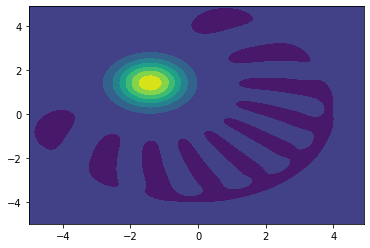

In [55]:
x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
rho = np.zeros([11, 11])
rho[0, 0] = 1
alpha = -1 + 1j
rho = Displacement(rho, alpha)

fockState = np.zeros(10)
fockState[0] = 1
state = displacement(fockState, alpha, cutoff)
rho = np.outer(np.conj(state), state)

m = len(x)
xx, pp = np.meshgrid(x, p)
xi_array = np.dstack((pp, xx))
start = time.time()
        
W = FockWigner_vec(xx, pp, rho)

h = plt.contourf(x, p, W)
t = time.time() - start
print(t)